<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv("../data/states_edu.csv")

Chosen test: math for 8th graders

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
df = df.rename(columns={"GRADES_8_G" : "Enroll 8",              #renaming some of the coloumns that I will use 
                        "AVG_MATH_8_SCORE" : "Avg math 8",
                       "STATE_REVENUE" : "State Revenue",
                       "YEAR" : "Year",
                       "TOTAL_REVENUE" : "Total Revenue",
                       "INSTRUCTION_EXPENDITURE" : "Instruction Expenditure",
                       "TOTAL_EXPENDITURE" :"Total Expenditure",
                       "AVG_MATH_4_SCORE" : "Avg math 4"})

In [4]:
df = df.dropna()           # droping all missing values 

In [5]:
df.head()

,PRIMARY_KEY,STATE,Year,ENROLL,Total Revenue,FEDERAL_REVENUE,State Revenue,LOCAL_REVENUE,Total Expenditure,Instruction Expenditure,...,GRADES_4_G,Enroll 8,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,Avg math 4,Avg math 8,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [6]:
df["Ratio instructional expnd to total expnd"] = df["Instruction Expenditure"]/ df["Total Expenditure"]  #creates new columns 
                                                                                                         # of ratio

Final feature list: combining features. I will be useing the features "Ratio instructional expnd to total expnd" and Average math score for 4th graders. 

Feature selection justification: I chose these because I thought the ratio of instructional expenditure to total expenditure whould be a better predictor than just the instructional expenditure or total expenditure by its self. Also, I think that the average score for the 4th graders will be a good indicater, because it is likely the kids will stay on track of where there were originally. 

<h2> EDA </h2>

Visualization 1

<AxesSubplot:xlabel='Ratio instructional expnd to total expnd', ylabel='Avg math 8'>

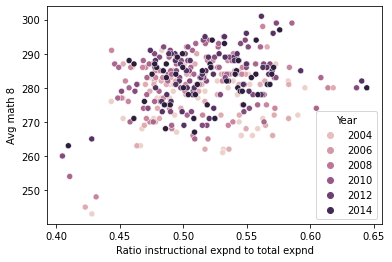

In [7]:
sns.scatterplot(data=df, x="Ratio instructional expnd to total expnd", y="Avg math 8", hue="Year")    #creates scatterplot

This is a scatter plot of the avgerage math score of 8th graders compared to the ratio of the instructional expenditure to the total expenditure. It is then color coded by year. We can see from the graph that there might be a loose association of math score to the ratio. We can also see that there does not appear to be a significant difference between the years. 

Visualization 2

<AxesSubplot:xlabel='Avg math 4', ylabel='Avg math 8'>

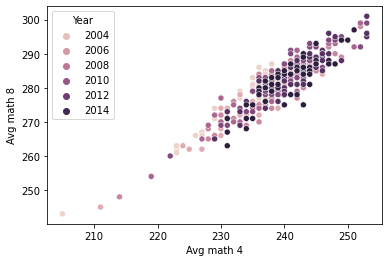

In [8]:
sns.scatterplot(data=df, x="Avg math 4", y="Avg math 8", hue = "Year")          #creates scatter plot

This scatter plot compares the average math score in year 4 vs the average math score in year 8. We can see that there is a strong association between the two. Also, we can see that there does not seem to be a significant difference between the years. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[["Ratio instructional expnd to total expnd", "Avg math 4", "Year"]]
y = df.loc[X.index]['Avg math 8']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: LARS lasso regression

In [24]:
# import your sklearn class here
from sklearn import linear_model

In [25]:
# create your model here
model = linear_model.LassoLars(alpha=.1)

In [26]:
model.fit(X_train, y_train)

LassoLars(alpha=0.1)

In [27]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

Text(0, 0.5, 'Avg math 8')

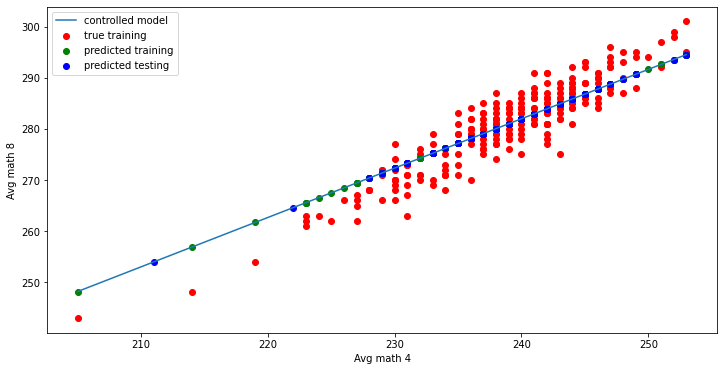

In [29]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "Avg math 4"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Avg math 8")

Text(0, 0.5, 'Avg math 8')

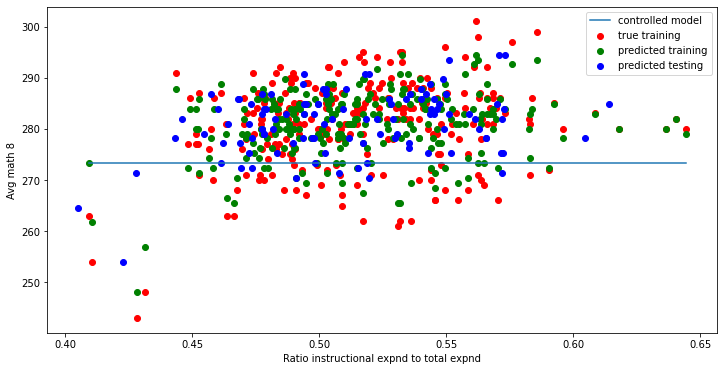

In [18]:
col_name = "Ratio instructional expnd to total expnd"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Avg math 8")

In [30]:
print(model.intercept_)
print(model.coef_)

50.21644966472371
[0.         0.96564608 0.        ]


In [31]:
model.score(X_test, y_test)

0.8258151066538529

In [34]:
np.mean(np.abs(model.predict(X_test)-y_test))     # mean absolute error

2.8190462358279693

In [33]:
np.mean((model.predict(X_test)-y_test)**2)**0.5    # root mean squared error 

3.4296424983328606

<h2> Summary </h2>

The model score is around .8 which means that the model does a fairly good job of predicting the average math score of 8th graders. Also, when looking at the mean absolute error and the root mean squared error, we can see that the model has a fairly low error and does a good job. When we break it down though by looking at the different visualizations it is clear that the reason the model worker fairly well is becasue it uses the data of the average math score of 4th graders. We can also see that the ratio of instructional expenditure to total expenditure does not appear to be a very good esimator. 